In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
sy_5min = pd.read_csv('SY-5minHLV.csv')
soybn_5min = pd.read_csv('SOYBN-5minHLV.csv')

In [8]:
def variance_ratio_test(df, max_lag):
    variance_ratios = {}
    z_stats = {}
    p_values = {}
    
    df['return_1'] = df['Close'].diff()
    returns_1 = df['return_1'].dropna()
    var_1 = np.var(returns_1, ddof=1)  # Use sample variance for consistency
    
    for q in range(1, max_lag + 1):
        df[f'return_{q}'] = df['Close'].diff(q)
        returns_q = df[f'return_{q}'].dropna()

        var_q = np.var(returns_q, ddof=1)  # Use sample variance

        variance_ratio = var_q / (q * var_1)
        variance_ratios[q] = variance_ratio

        n = len(returns_q)
        standard_error = np.sqrt((2 * (2 * q - 1) * (q - 1)) / (3 * q * n))

        z_stat = (variance_ratio - 1) / standard_error
        z_stats[q] = z_stat

        p_value = stats.norm.sf(abs(z_stat)) * 2  # Two-tailed test
        p_values[q] = p_value
    
    return variance_ratios, z_stats, p_values

In [11]:
max_lag = 90 *12 # 5-min intervals, 12 intervals in one hour

sy_vr, sy_z, sy_p = variance_ratio_test(sy_5min, max_lag)
soybn_vr, soybn_z, soybn_p = variance_ratio_test(soybn_5min, max_lag)

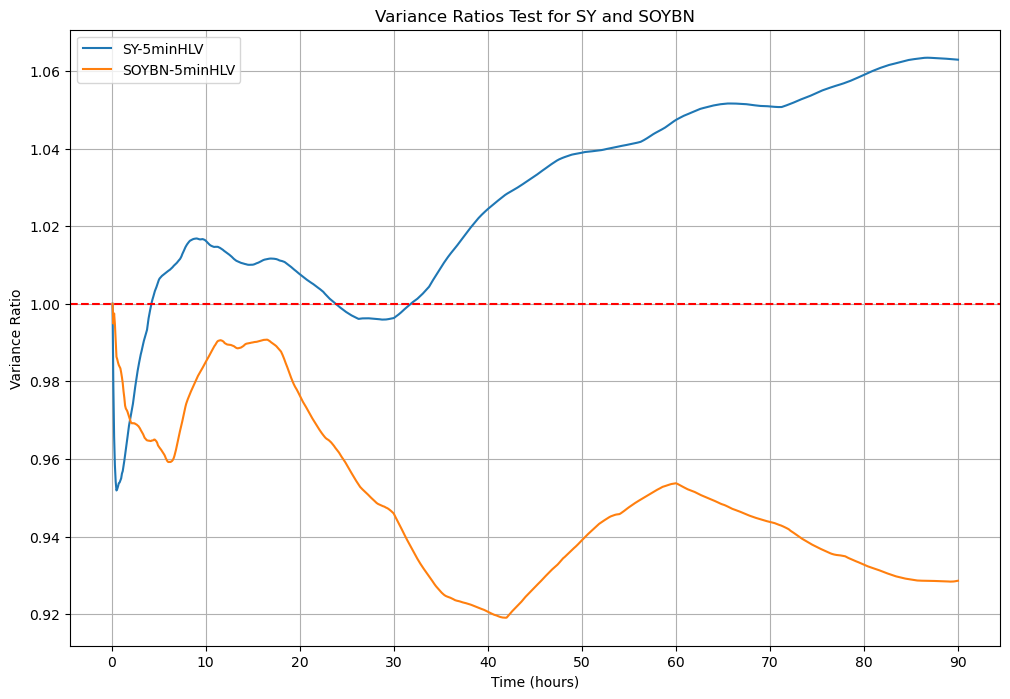

In [12]:
hours_sy = [lag / 12 for lag in sy_vr.keys()]
hours_soybn = [lag / 12 for lag in soybn_vr.keys()]

plt.figure(figsize=(12, 8))
plt.plot(hours_sy, list(sy_vr.values()), label='SY-5minHLV')
plt.plot(hours_soybn, list(soybn_vr.values()), label='SOYBN-5minHLV')
plt.title('Variance Ratios Test for SY and SOYBN')
plt.xlabel('Time (hours)')
plt.ylabel('Variance Ratio')
plt.axhline(y=1, color='red', linestyle='--')
plt.legend()
plt.grid(True)

max_hours = max(hours_sy[-1], hours_soybn[-1])
plt.xticks(range(0, int(max_hours) + 1, 10)) 

plt.show()

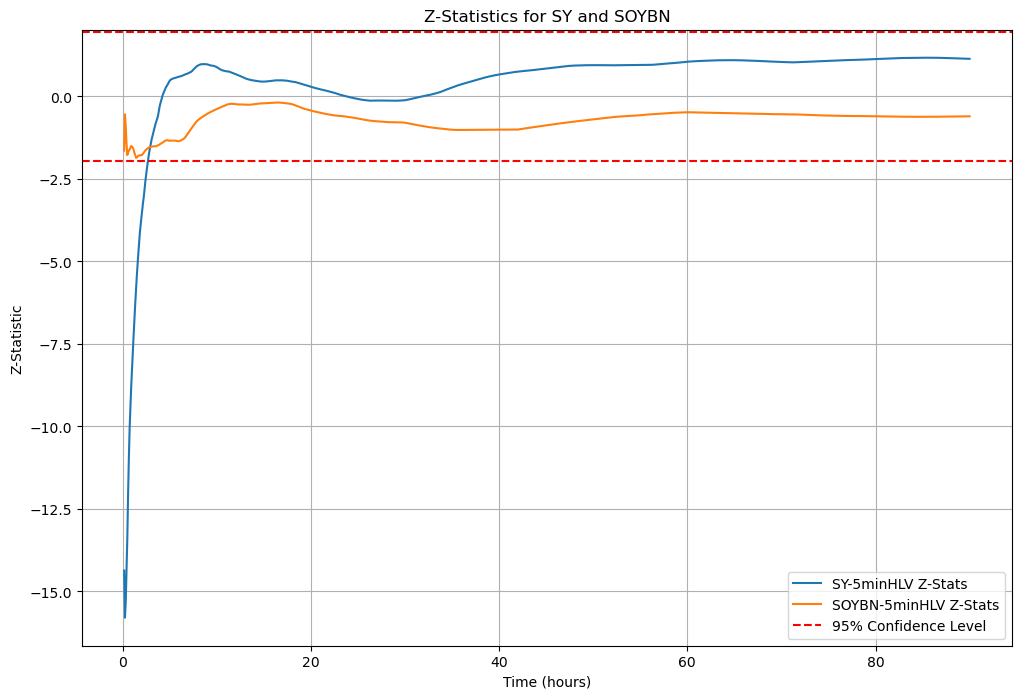

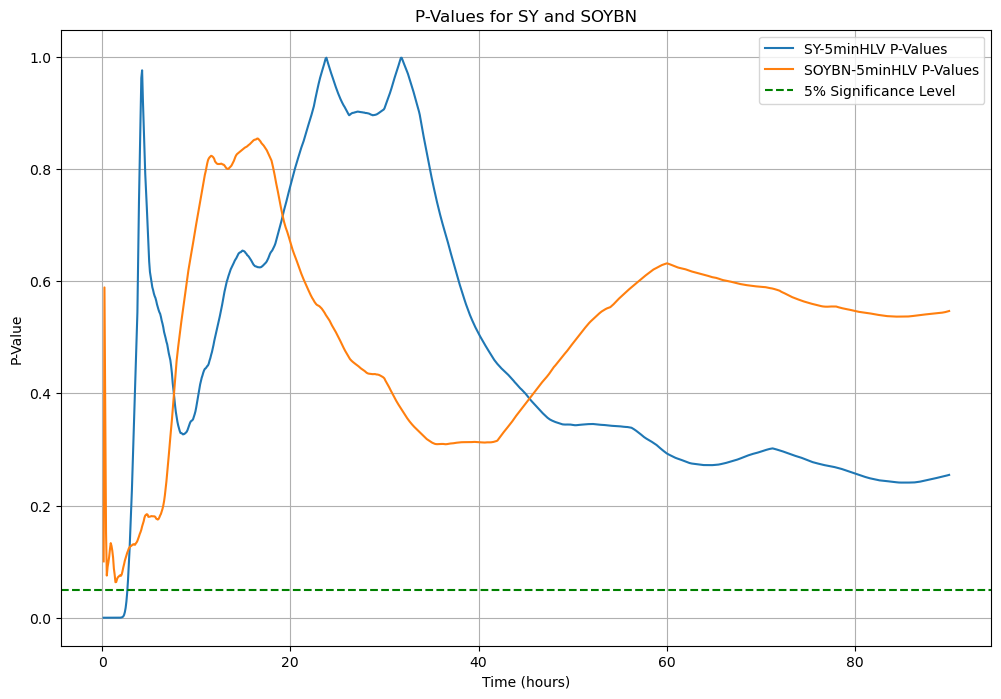

In [13]:
# Plotting Z-Statistics
plt.figure(figsize=(12, 8))
plt.plot([q / 12 for q in sy_z], list(sy_z.values()), label='SY-5minHLV Z-Stats')
plt.plot([q / 12 for q in soybn_z], list(soybn_z.values()), label='SOYBN-5minHLV Z-Stats')
plt.axhline(y=1.96, color='red', linestyle='--', label='95% Confidence Level')
plt.axhline(y=-1.96, color='red', linestyle='--')
plt.title('Z-Statistics for SY and SOYBN')
plt.xlabel('Time (hours)')
plt.ylabel('Z-Statistic')
plt.legend()
plt.grid(True)
plt.show()

# Plotting P-Values
plt.figure(figsize=(12, 8))
plt.plot([q / 12 for q in sy_p], list(sy_p.values()), label='SY-5minHLV P-Values')
plt.plot([q / 12 for q in soybn_p], list(soybn_p.values()), label='SOYBN-5minHLV P-Values')
plt.axhline(y=0.05, color='green', linestyle='--', label='5% Significance Level')
plt.title('P-Values for SY and SOYBN')
plt.xlabel('Time (hours)')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()

Z-Statistics Analysis:

A z-statistic outside  ±1.96 (95% confidence level) indicates a significant deviation from the null hypothesis, which in this case is the hypothesis of a random walk.

For 'SY-5minHLV', the z-statistics fluctuate around the confidence level thresholds initially but stay within the bounds after about 10 hours, suggesting no significant deviation from a random walk behavior later on.

For 'SOYBN-5minHLV', the z-statistic drops significantly below -1.96 very early on and remains there for the rest of the time period. This suggests a strong rejection of the random walk hypothesis and indicates persistent mean-reversion behavior.

P-Values Analysis:

P-values below the 0.05 suggest that the results are statistically significant, allowing us to reject the null hypothesis.

For both 'SY-5minHLV' and 'SOYBN-5minHLV', there are periods where the p-value dips below the 0.05 threshold, indicating significant periods where the price series deviates from a random walk.

Notably, 'SOYBN-5minHLV' shows significant p-values near the start, reinforcing the evidence of mean-reversion seen in the Z-Statistics plot.

Variance Ratio Test Analysis:

For 'SY-5minHLV', the variance ratio starts below 1, indicating mean-reversion behavior initially. However, as time progresses, the variance ratio exceeds 1, particularly noticeable past approximately 40 hours, suggesting the presence of trend-following behavior in this period.

For 'SOYBN-5minHLV', the variance ratio is consistently below 1 across all time scales shown in the plot, suggesting that this series exhibits mean-reverting behavior. There's no indication of a transition to trend-following behavior within the observed time frame.

Regarding the approximate location and range of time-scales of inefficiency:

'SY-5minHLV' shows mean-reversion in the initial hours, up to around 40 hours, after which trend-following behavior becomes apparent and continues for the remainder of the observed time.

'SOYBN-5minHLV' demonstrates mean-reversion throughout the entire range of time scales observed in the plot (from 0 to beyond 80 hours).

Summary:

For 'SY-5minHLV', the variance ratio starts below 1, indicating mean-reversion behavior initially which transitions to a trend-following pattern after approximately 40 hours. This is partially supported by z-statistics, which oscillate around the critical threshold but do not indicate persistent significant deviations from a random walk in later periods.

For 'SOYBN-5minHLV' consistently shows a variance ratio below 1, with z-statistics deeply negative and p-values below the significance level early on, strongly suggesting mean-reversion behavior throughout. This persistent mean-reversion could offer opportunities for specific trading strategies, especially in the short term.